In [461]:
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#softmax function uses logistic Regression classification for binary classification

In [462]:
spine_data = pd.read_csv('datasets/spine_data.csv' , 
                         skiprows=1,
                         names= ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope',
                                 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'direct_tilt',
                                 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope','class'])

In [463]:
spine_data.shape

(310, 13)

In [464]:
spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [465]:
#shuffle data (train_test_split performs the shuffle too.. this is not really required!)
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [466]:
spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0.793169,19.5456,8.7779,16.40308,-35.287375,31.6243,Abnormal
1,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0.303206,25.2382,7.1750,10.20296,-33.025711,17.1654,Abnormal
2,46.637864,15.853717,40.000000,30.784147,119.377603,9.064582,0.478971,23.5284,11.0671,7.58202,5.157255,17.4690,Normal
3,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180,Abnormal
4,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


In [467]:
spine_data.shape

(310, 13)

In [468]:
# To check if any field has null values -- seems there is no missing values in this dataset
spine_data[spine_data.isnull().any(axis=1)].count()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [469]:
# to drop all null values
spine_data.dropna(inplace=True)

In [470]:
# To check if any field has null values
spine_data[spine_data.isnull().any(axis=1)].count()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [471]:
spine_data.shape

(310, 13)

In [472]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [473]:
label_encoding = preprocessing.LabelEncoder()

spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [474]:
spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0.793169,19.5456,8.7779,16.40308,-35.287375,31.6243,0
1,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0.303206,25.2382,7.1750,10.20296,-33.025711,17.1654,0
2,46.637864,15.853717,40.000000,30.784147,119.377603,9.064582,0.478971,23.5284,11.0671,7.58202,5.157255,17.4690,1
3,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180,0
4,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,1


In [475]:
# to find of the correlation between features
spine_data_corr = spine_data.corr()
spine_data_corr

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


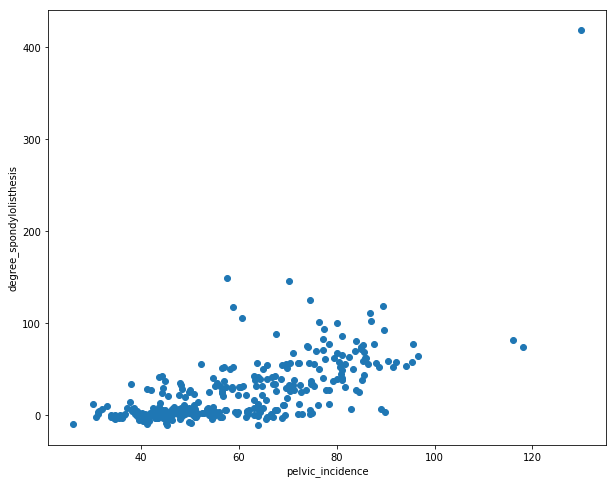

In [476]:
# to check the relationship between pelvic_incidence and degree_spondylolisthesis

fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(spine_data['pelvic_incidence'], spine_data['degree_spondylolisthesis'])

plt.xlabel('pelvic_incidence')
plt.ylabel('degree_spondylolisthesis')

plt.show()
# the below scatter plot shows that there is a linear relationship between these two variables

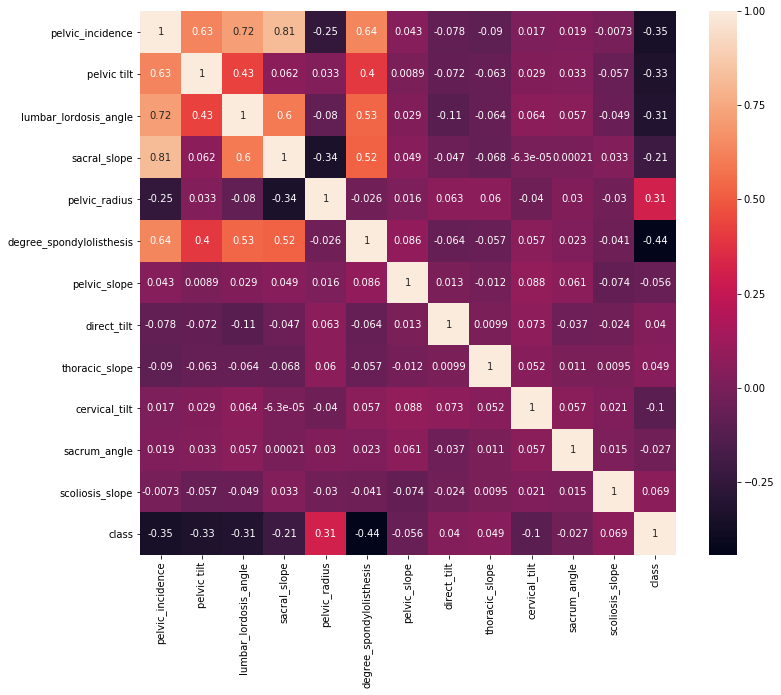

In [477]:
# let's visualize the relationship between the features

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(spine_data_corr, annot=True)

In [478]:
X = spine_data.drop(['class'], axis=1)
y = spine_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [479]:
X_train.shape, y_train.shape

((248, 12), (248,))

In [480]:
X_test.shape, y_test.shape

((62, 12), (62,))

In [481]:
#initialize
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [482]:
# activation allows neurons in NN learn non-linear relationship in data - activation='relu',
# hidden_layer_sizes: number of layers and number of neurons in each layer
#optimizer here is lbfgs
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 10),
                       activation='logistic',
                       solver='lbfgs',
                       alpha=0.001,
                       verbose=True,
                       max_iter=1000)

In [483]:
mlp_clf.fit(X_train, y_train)
# alpha=0.0001 is L2 regularization penalty

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [484]:
y_pred = mlp_clf.predict(X_test)

In [485]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)


,y_test,y_pred
121,0,0
219,1,1
250,0,0
200,0,0
150,1,1
143,1,0
277,1,1
136,0,0
287,0,0
284,0,0


In [486]:
mlp_clf.score(X_train, y_train)

1.0

In [487]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [488]:
spine_data_cross_tab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
spine_data_cross_tab

y_pred,0,1
y_test,,
0,40,5
1,5,12


In [489]:
print(confusion_matrix(y_test, y_pred))

[[40  5]
 [ 5 12]]


In [490]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.71      0.71      0.71        17

   micro avg       0.84      0.84      0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



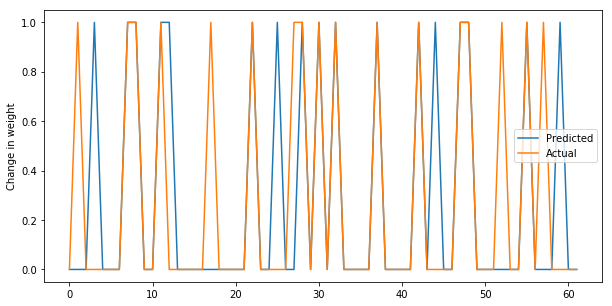

In [491]:
plt.figure(figsize=(10,5))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Change in weight')

plt.legend()

plt.show()